# Breakdown of this Notebook:

   Importing Libraries
   Loading dataset
   Data Cleaning:

    Deleting redundant columns.
    Dropping duplicates.
    Cleaning individual columns.
    Remove the NaN values from the dataset
    Some Transformations

   Data Visualization: Using plots to find relations between the features.
        Type: Movie and TV Shows
        Rating
        Relation between Type and Rating
   Word Cloud
        genre
        stars
   Classification
   Analysis
    
   This dataset contains information concerning TV Shows and Movies added to the Netflix catalog, including:

   General information: id, title, type (TV Show or Movie), stars and a brief description.
   Date fields: When the show was released and when it was added to the catalog.
   Categorization: Rating and votes in which the show is listed.


### Introduction

Netflix! What is believed to have started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.

If we're going to be working with this data, we know a good place to start would be to probably start working with pandas.

### About the Dataset

#### Context

This data is all about Movies That are available on Netflix Website movies title, cast of the movie,desc of movies, duration, rating on IMDB, voted by people, year, genre, certificate

#### Source

This dataset originates from the IMDB website data and is collected using web scraping

#### Importing libreries and Loading the dataset

Alright, we now have a pandas, the most common way to work with tabular data in Python. Now back to the task at hand. We want to follow up on our friend's assertion that movie lengths have been decreasing over time. A great place to start will be a visualization of the data.

Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but matploblib.pyplot is one of the most common packages to do so.

Note: In order for us to correctly test your plot, you will need to initalize a matplotlib.pyplot Figure object, which we have already provided in the cell below. You can continue to create your plot as you have learned in Intermediate Python.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [96]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Inspect the dataset

Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

    What does this trend look like over a longer period of time?
    Is this explainable by something like the genre of entertainment?

Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. We now have access to the CSV file, available at the path "n_movies.csv". Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.

In [97]:
# Load and read the dataset
netflix = pd.read_csv('n_movies.csv')
netflix.head(5)


,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


#### Observations
Columns like (descripton) are irrelevant to our analysis and need to be dropped

There isn't many NaN values in the most important columns though df.describe() shows alot of 0 values
the release_date column are the wrong type 

### Shape of the Dataset

In [98]:
# show the shape of the dataset
netflix.shape

(9957, 9)

In [99]:
# columns
netflix.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

### Clean and wrangle the dataset

In [100]:
# check for null values
netflix.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

In [101]:
# check for duplicate values
netflix.duplicated().sum()

0

In [102]:
# check for unique values
netflix.nunique()

title          7912
year            498
certificate      20
duration        291
genre           569
rating           79
description    9433
stars          8615
votes          4862
dtype: int64

In [103]:
# creating a copy of the dataset
df = netflix.copy()

In [104]:
# current shape
df.shape

(9957, 9)

In [105]:
# dropping null values
df=df.dropna()
df.shape

(5754, 9)

In [106]:
#droping description column because it's not important 
df.drop(columns=['description'],inplace=True)

In [107]:
# current dataset
df.head(10)

,title,year,certificate,duration,genre,rating,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
5,The Sandman,(2022– ),TV-MA,45 min,"Drama, Fantasy, Horror",7.8,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358"
6,Rick and Morty,(2013– ),TV-MA,23 min,"Animation, Adventure, Comedy",9.2,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...","502,160"
7,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...","1,831,340"
8,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,123"
9,Blonde,(2022),NC-17,166 min,"Biography, Drama, Mystery",6.2,"['Andrew Dominik', '| ', ' Stars:', 'Ana de...",935


### Data visualization 

In [108]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating', 'stars',
       'votes'],
      dtype='object')

In [109]:
#Deleting duplicates depending on max number of them 
genre_df=pd.DataFrame(df.groupby("genre").max()['votes'])
genre_df.shape
genre_df

,votes
genre,
Action,796
"Action, Adventure","33,388"
"Action, Adventure, Biography","49,337"
"Action, Adventure, Comedy","8,638"
"Action, Adventure, Crime","98,315"
...,...
Sport,"1,597"
Talk-Show,"5,702"
Thriller,993


In [110]:
genre_df.loc["Action, Adventure, Biography",'votes']

'49,337'

In [111]:
# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(df)

# Print the DataFrame
durations_df

,title,year,certificate,duration,genre,rating,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [112]:
# Select only the columns of interest
netflix_movies_col_subset = df[['title', 'genre', 'year', 'duration']]

# Select only the columns of interest
netflix_movies_col_subset_v = df[['votes']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset[0:20]

,title,genre,year,duration
0,Cobra Kai,"Action, Comedy, Drama",(2018– ),30 min
1,The Crown,"Biography, Drama, History",(2016– ),58 min
2,Better Call Saul,"Crime, Drama",(2015–2022),46 min
3,Devil in Ohio,"Drama, Horror, Mystery",(2022),356 min
4,Cyberpunk: Edgerunners,"Animation, Action, Adventure",(2022– ),24 min
5,The Sandman,"Drama, Fantasy, Horror",(2022– ),45 min
6,Rick and Morty,"Animation, Adventure, Comedy",(2013– ),23 min
7,Breaking Bad,"Crime, Drama, Thriller",(2008–2013),49 min
8,The Imperfects,"Action, Adventure, Drama",(2022– ),45 min
9,Blonde,"Biography, Drama, Mystery",(2022),166 min


### Creating a Scatter Plot

This is already much more informative than the simple plot we created when our friend first gave us some data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.

This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.

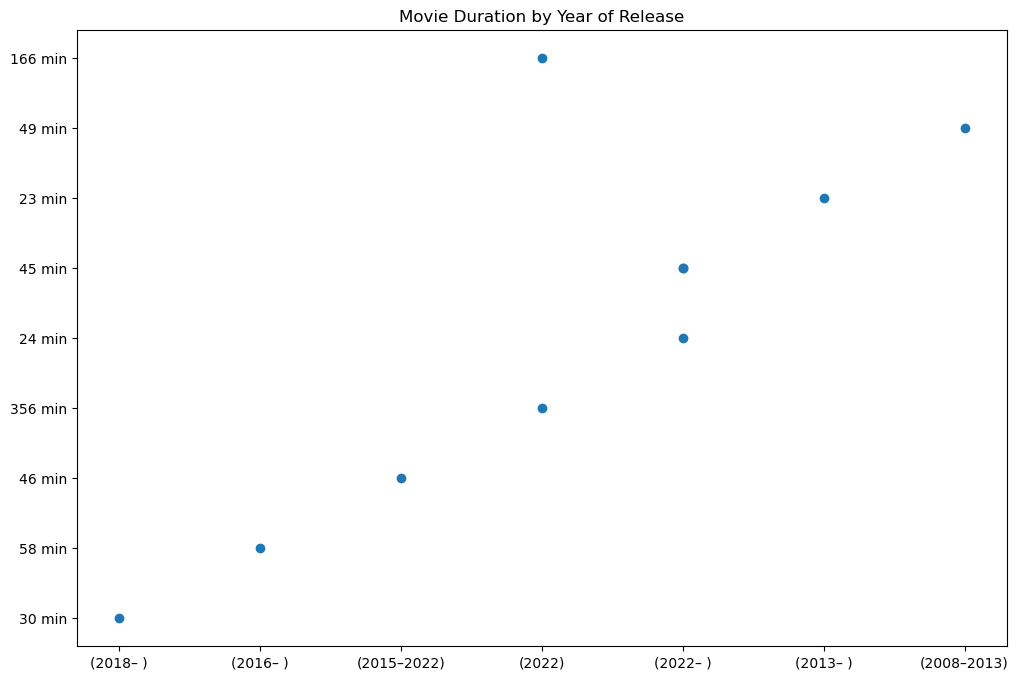

In [113]:

# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset[0:10]["year"], netflix_movies_col_subset[0:10]["duration"])

# Create a title
plt.title("Movie Duration by Year of Release") 

# Show the plot
plt.show()

<AxesSubplot:>

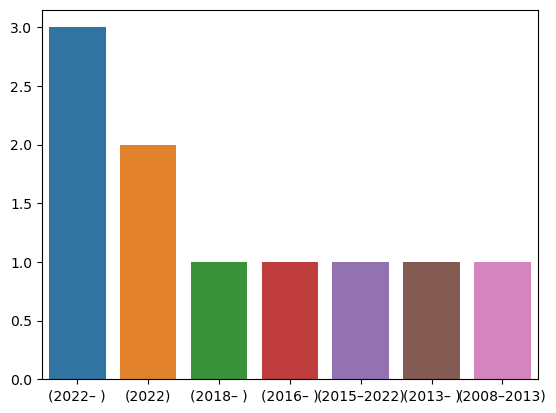

In [114]:
sns.barplot(x=netflix_movies_col_subset[0:10]['year'].value_counts().index,y=netflix_movies_col_subset[0:10]['year'].value_counts().values)

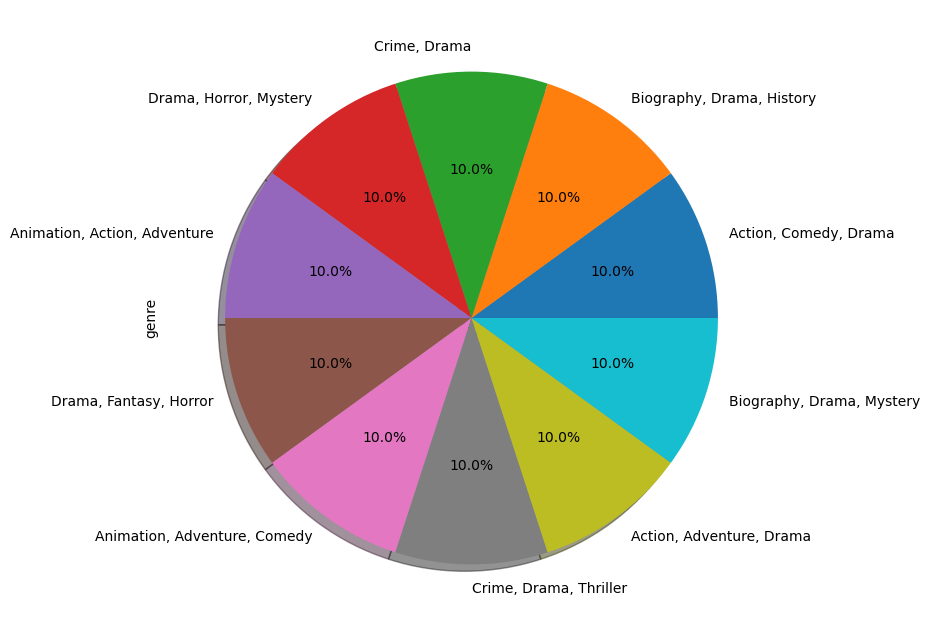

In [115]:
# Piechart visual
netflix_movies_col_subset[0:10]['genre'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

### What is the average rating?

In [116]:
runtime_avg = df['rating'].mean() #average runtime of movies
runtime_avg

6.792822384428223

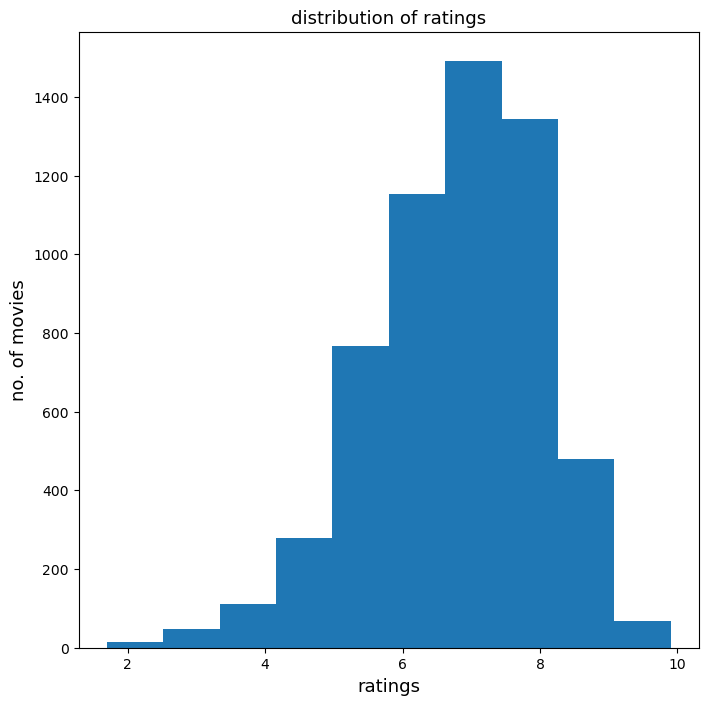

In [117]:
plt.hist(df['rating'])
plt.gcf().set_size_inches(8, 8)
plt.xlabel('ratings',fontsize=13)
plt.ylabel('no. of movies', fontsize=13)
plt.title('distribution of ratings', fontsize=13);

In [118]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Show number of stars involved in the cast

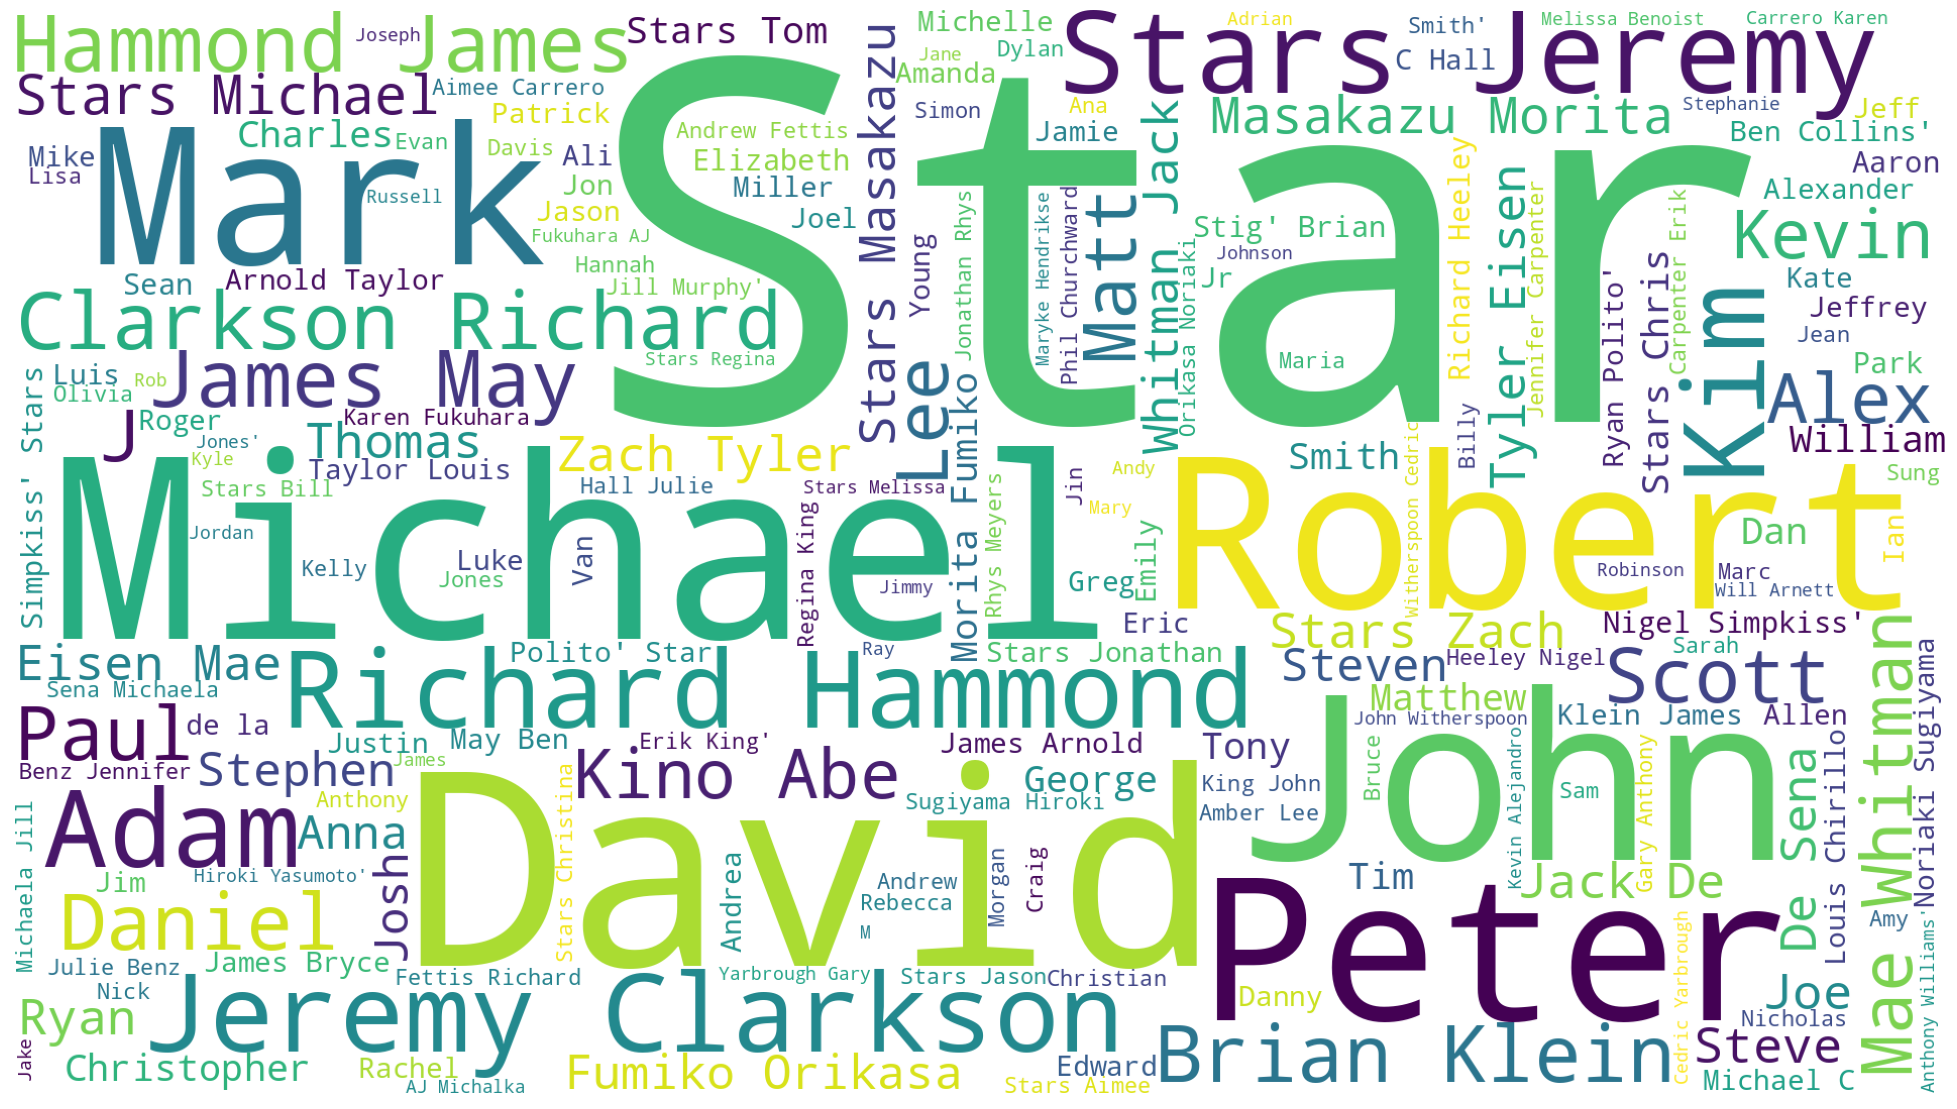

In [119]:
from wordcloud import WordCloud
from IPython.core.display import HTML

#text = df.stars[9]


plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.stars))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('stars.png')
plt.show()
                                   

#wc=WordCloud(use_tfidf=False,stopwords=ENGLISH_STOP_WORDS)
#don't randomize color, show only top 50
#embed_code=wc.get_embed_code(text=texts,random_color=False,topn=50)
#HTML(embed_code)

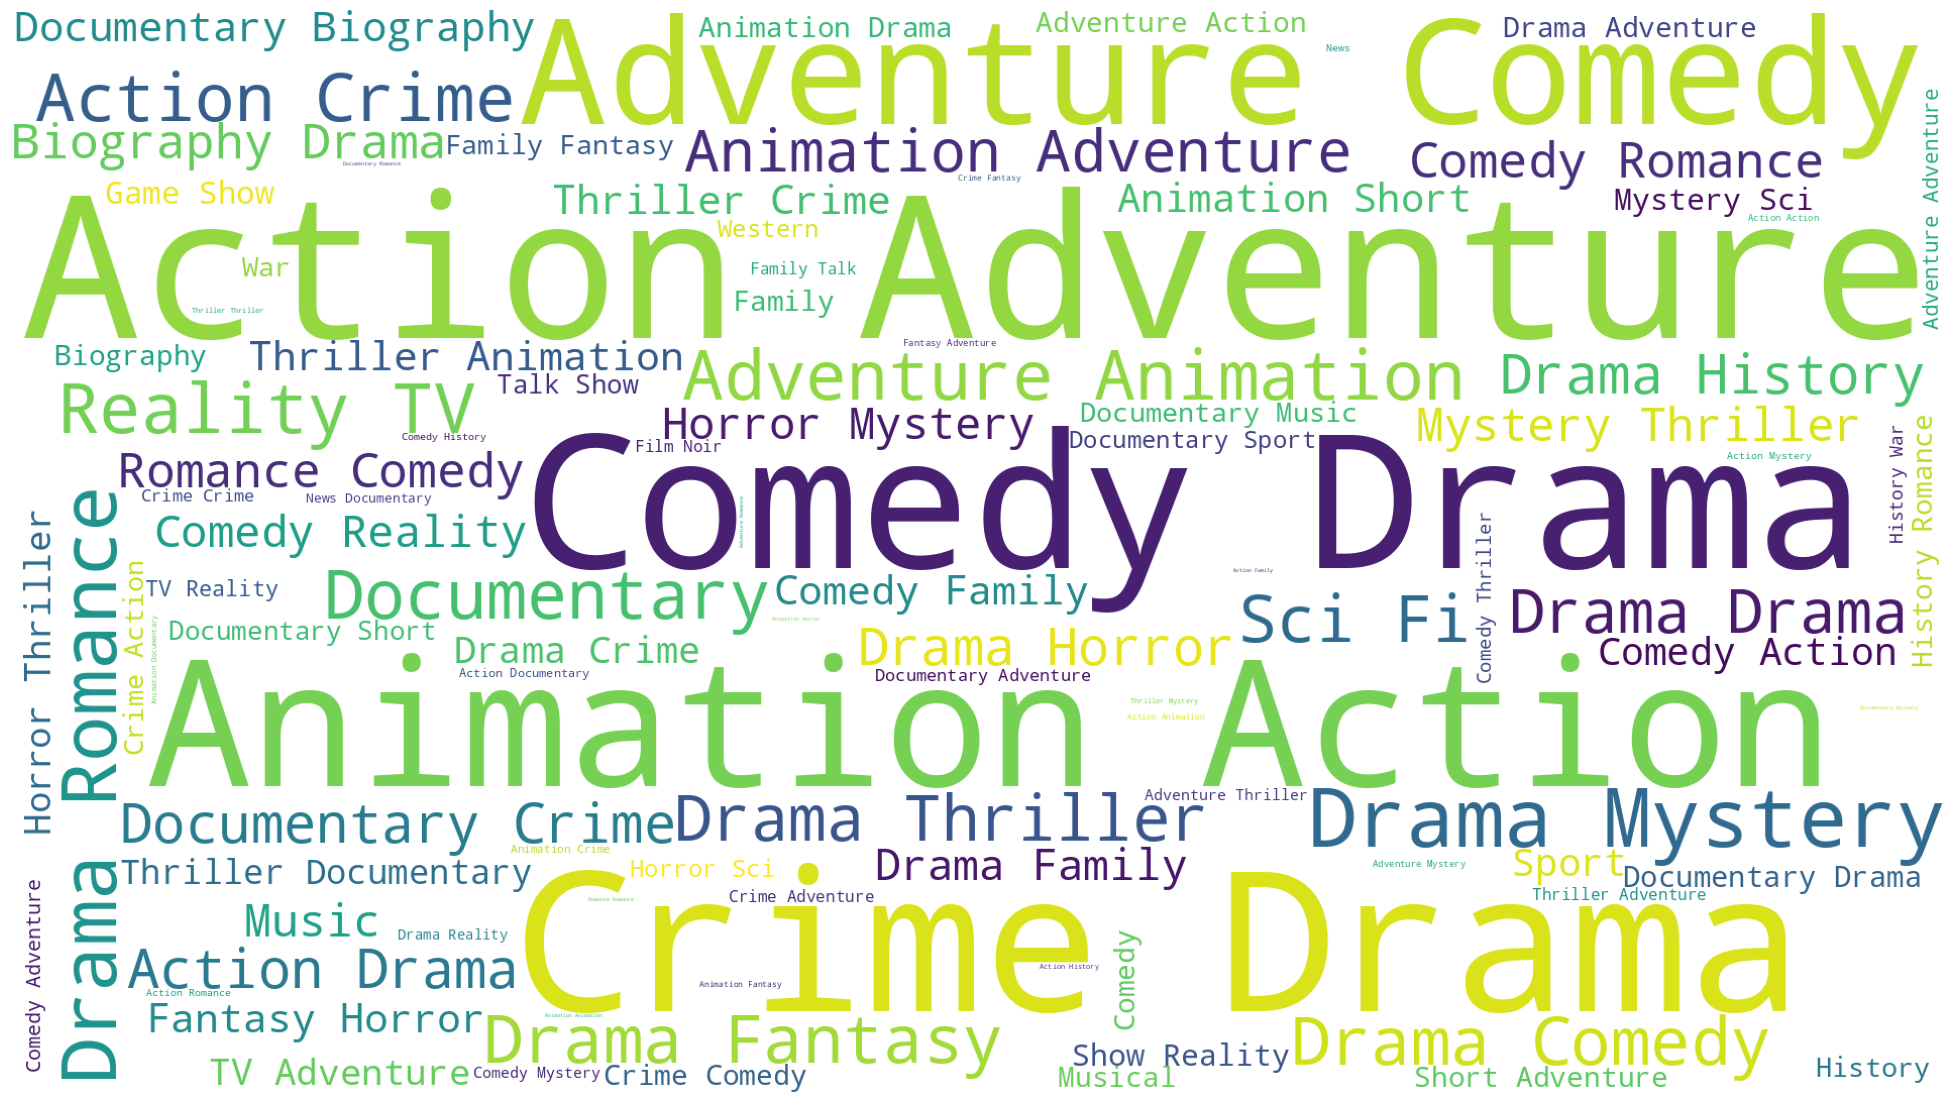

In [120]:
from wordcloud import WordCloud
from IPython.core.display import HTML

#text = df.stars[9]


plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.genre))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('genre.png')
plt.show()
              

### Building a Training models

In [121]:
df.replace('min', '')
df.replace(',','', regex=True, inplace=True)
df.replace(',','', regex=True, inplace=True)

In [122]:
c = df.select_dtypes(object).columns
df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [123]:
df

,title,year,certificate,duration,genre,rating,stars,votes
0,NaN,NaN,NaN,NaN,NaN,8.5,NaN,177031
1,NaN,NaN,NaN,NaN,NaN,8.7,NaN,199885
2,NaN,NaN,NaN,NaN,NaN,8.9,NaN,501384
3,NaN,NaN,NaN,NaN,NaN,5.9,NaN,9773
4,NaN,NaN,NaN,NaN,NaN,8.6,NaN,15413
...,...,...,...,...,...,...,...,...
9952,NaN,NaN,NaN,NaN,NaN,6.3,NaN,3130
9953,NaN,NaN,NaN,NaN,NaN,8.1,NaN,970067
9954,NaN,NaN,NaN,NaN,NaN,8.7,NaN,199898
9955,NaN,NaN,NaN,NaN,NaN,8.4,NaN,439601


#### Training the Test Split

In [124]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = df['rating']
predicted_class = df['votes']

In [125]:
X = feature_columns.values
y = predicted_class.values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [145]:
print(X_train[0:10])
print(X_test[0:10])
print(y_train[0:10])
print(y_test[0:10])

[7.3 8.2 5.7 5.8 5.9 5.  5.8 7.3 4.8 8.3]
[6.5 7.5 5.9 6.6 6.9 8.2 7.1 8.  5.2 4.4]
[50086   767 85193 11438  4547  3889 21221  7337 49602  3275]
[62142  8553  3115  1364 10474  5273   985  9520 35855  5339]


In [149]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array([7.3, 8.2, 5.7, 5.8, 5.9, 5.0,  5.8, 7.3, 4.8, 8.3])
y = np.array([50086, 767, 85193, 11438, 4547, 3889, 21221, 7337, 49602, 3275])

In [170]:

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

print(lr.predict(X_test.reshape(-1,1)))

[23054.05910444 15482.49359817 27596.99840819 ... 23054.05910444
 22296.90255381 14725.33704755]


In [172]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x.reshape(-1, 1), y)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x.reshape(-1,1), y)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test.reshape(-1,1), y_test)))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.00


##### NB

A big portion of the data was dropped inorder to avoid affecting the results due to the 0 values filling the data so the analysis might not be error proof.

### Conclusion 

The average ratings for the movies is 6.79 scores

The model has a prediction accuracy of 0.80

The amount of movies produced over the years had a high trend of increasing in now and during the start of 2022

Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.

we've performed an exploratory analysis and classification of some entertainment data, and there are lots of fun ways to develop your skills as a Pythonic data scientist. These include learning how to analyze data further with statistics, creating more advanced visualizations, and perhaps most importantly, learning more advanced ways of working with data in pandas. 

### Limitations

Finally, we must add that all the above results are limited to the given database, adding that during the past two years and according to the COVID-19 pandemic, there has been a significant change in all production industries which naturally affects the film industry.
